In [1]:
import os
import numpy as np
import pandas as pd  

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from pathlib import Path

import selective_recruitment.plotting as plotting
import selective_recruitment.recruite_ana as ra
import selective_recruitment.globals as gl
import selective_recruitment.scripts.script_prep_sc as ss


from statsmodels.stats.anova import AnovaRM  # perform F test

In [2]:
# setting working directory
# wkdir = '/Volumes/diedrichsen_data$/data/Cerebellum/Demand/selective_recruit'
wkdir = 'A:\data\Cerebellum\CerebellumWorkingMemory\selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/srv/diedrichsen/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'
if not Path(wkdir).exists():
    wkdir = '/Users/jdiedrichsen/Data/wm_cerebellum/selective_recruit'

In [3]:
label_dict = {1: 'Enc2F', 2: 'Ret2F',
              3: 'Enc2B', 4: 'Ret2B',
              5: 'Enc4F', 6: 'Ret4F',
              7: 'Enc4B', 8: 'Ret4B',
              9: 'Enc6F', 10: 'Ret6F',
              11: 'Enc6B', 12: 'Ret6B',
              13: 'rest'}
marker_dict = {1: 'o', 2: 'X',
               3: 'o', 4: 'X',
               5: 'o', 6: 'X',
               7: 'o', 8: 'X',
               9: 'o', 10: 'X',
               11: 'o', 12: 'X',
               13: 's'}
color_dict = {1: 'b', 2: 'b',
              3: 'r', 4: 'r',
              5: 'b', 6: 'b',
              7: 'r', 8: 'r',
              9: 'b', 10: 'b',
              11: 'r', 12: 'r',
              13: 'g'}

# over the whole cerebellum vs. over the whole cortex

In [4]:
# D = ra.get_summary(dataset = "WMFS",
#                 ses_id = 'ses-02',
#                 type = "CondAll")
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(wkdir + '/ROI_all_reg.tsv',sep='\t')

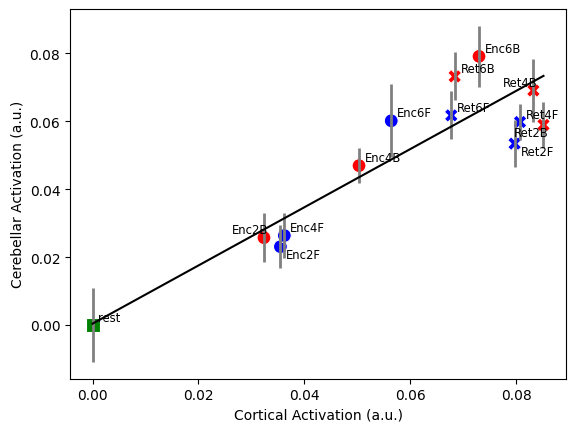

In [5]:
df_path = os.path.join(wkdir, "ROI_all_reg.tsv")
df1 = pd.read_csv(df_path, sep="\t")
plotting.make_scatterplot(df1, x = "X", y = "Y", split='cond_num',
                          labels=label_dict,
                          markers=marker_dict,
                          colors=color_dict)

In [6]:
# need to pass
# print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
#               subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())
print(AnovaRM(data=df1[df1.cond_name != 'rest'], depvar='res',
              subject='sn', within=['load', 'recall', 'phase'], aggregate_func=np.mean).fit())

                     Anova
                  F Value Num DF  Den DF Pr > F
-----------------------------------------------
load              15.0326 2.0000 30.0000 0.0000
recall            11.0937 1.0000 15.0000 0.0046
phase              0.9164 1.0000 15.0000 0.3536
load:recall        0.6760 2.0000 30.0000 0.5162
load:phase         1.9039 2.0000 30.0000 0.1666
recall:phase       1.0568 1.0000 15.0000 0.3202
load:recall:phase  0.5891 2.0000 30.0000 0.5611



# using connectivity weights

## with hierarchical parcellation (32 parcels)

In [7]:
# D = ss.get_summary_conn(dataset="WMFS",
#                         ses_id='ses-02',
#                         type="CondHalf",
#                         cerebellum_roi='NettekovenSym68c32',
#                         cortex_roi="Icosahedron1002",
#                         add_rest=True)
# D = ra.run_regress(D, fit_intercept=True)
# D.to_csv(wkdir + '/ROI_NettekovenSym68c32_conn_reg.tsv', sep='\t')

In [8]:
df_path = os.path.join(wkdir, "ROI_NettekovenSym68c32_conn_reg.tsv")
df4 = pd.read_csv(df_path, sep="\t")

Text(0.5, 23.52222222222222, 'predicted cerebellar activation')

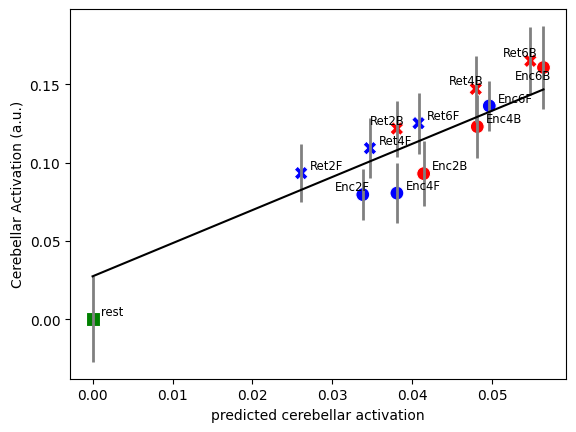

In [9]:
roi_name = 'D1R'
plotting.make_scatterplot(df4.loc[df4.roi_name == roi_name], split='cond_num',
                          labels=label_dict,
                          markers=marker_dict,
                          colors=color_dict)
plt.xlabel("predicted cerebellar activation")

In [10]:
# print(AnovaRM(data=df4[df4.cond_name!='rest'][df4.roi == roi_num], depvar='res',
#               subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

print(AnovaRM(data=df4[df4.cond_name != 'rest'][df4.roi_name == roi_name], depvar='res',
              subject='sn', within=['load', 'recall', 'phase'], aggregate_func=np.mean).fit())

                     Anova
                  F Value Num DF  Den DF Pr > F
-----------------------------------------------
load               3.7053 2.0000 30.0000 0.0365
recall             4.0134 1.0000 15.0000 0.0635
phase              2.3604 1.0000 15.0000 0.1453
load:recall        1.6580 2.0000 30.0000 0.2075
load:phase         1.9624 2.0000 30.0000 0.1581
recall:phase       0.2102 1.0000 15.0000 0.6532
load:recall:phase  0.9668 2.0000 30.0000 0.3918



/tmp/ipykernel_348332/1597424658.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(AnovaRM(data=df4[df4.cond_name != 'rest'][df4.roi_name == roi_name], depvar='res',


## with hierarchical parcellation divided into anterior/posterior (32 parcels)

In [11]:
# D = ss.get_summary_conn(dataset="WMFS",
#                         ses_id='ses-02',
#                         type="CondHalf",
#                         cerebellum_roi='NettekovenSym68c32AP',
#                         cortex_roi="Icosahedron1002",
#                         add_rest=True)
# D = ra.run_regress(D, fit_intercept=True)
# D.to_csv(wkdir + '/ROI_NettekovenSym68c32AP_conn_reg.tsv', sep='\t')

In [12]:
df_path = os.path.join(wkdir, "ROI_NettekovenSym68c32AP_conn_reg.tsv")
df44 = pd.read_csv(df_path, sep="\t")

Text(0.5, 23.52222222222222, 'predicted cerebellar activation')

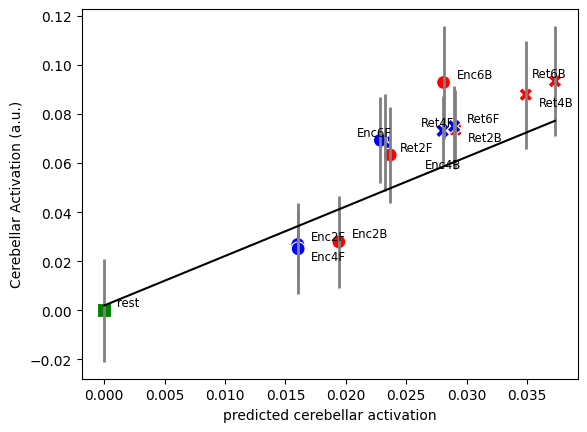

In [13]:
# create the scatterplot
roi_name = "D2R_P"
plotting.make_scatterplot(df44.loc[df44.roi_name == roi_name], split='cond_num',
                          labels=label_dict,
                          markers=marker_dict,
                          colors=color_dict)
plt.xlabel("predicted cerebellar activation")

In [14]:
# print(AnovaRM(data=df4[df4.cond_name!='rest'][df4.roi == roi_num], depvar='res',
#               subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

print(AnovaRM(data=df44[df44.cond_name != 'rest'][df44.roi_name == roi_name], depvar='res',
              subject='sn', within=['load', 'recall', 'phase'], aggregate_func=np.mean).fit())

                     Anova
                  F Value Num DF  Den DF Pr > F
-----------------------------------------------
load               3.2591 2.0000 30.0000 0.0524
recall             0.9030 1.0000 15.0000 0.3570
phase              0.1460 1.0000 15.0000 0.7077
load:recall        2.5570 2.0000 30.0000 0.0943
load:phase         3.7621 2.0000 30.0000 0.0348
recall:phase       0.7364 1.0000 15.0000 0.4043
load:recall:phase  1.6096 2.0000 30.0000 0.2168



/tmp/ipykernel_348332/4147747335.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(AnovaRM(data=df44[df44.cond_name != 'rest'][df44.roi_name == roi_name], depvar='res',


## Compare residuals across regions

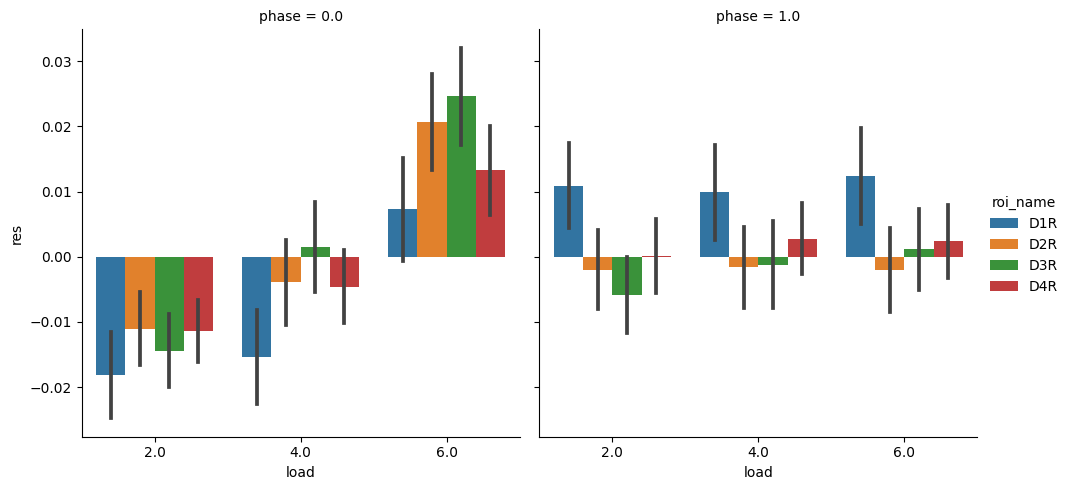

In [15]:
df4["roi_super"] = df4["roi_name"].str[0]
df4["roi_hemi"] = df4["roi_name"].str[-1]
sns.catplot(data = df4.loc[(df4.roi_super == "D") & (df4.roi_hemi == "R")], x="load", y="res", hue="roi_name",
                col="phase", errorbar='se', kind='bar')

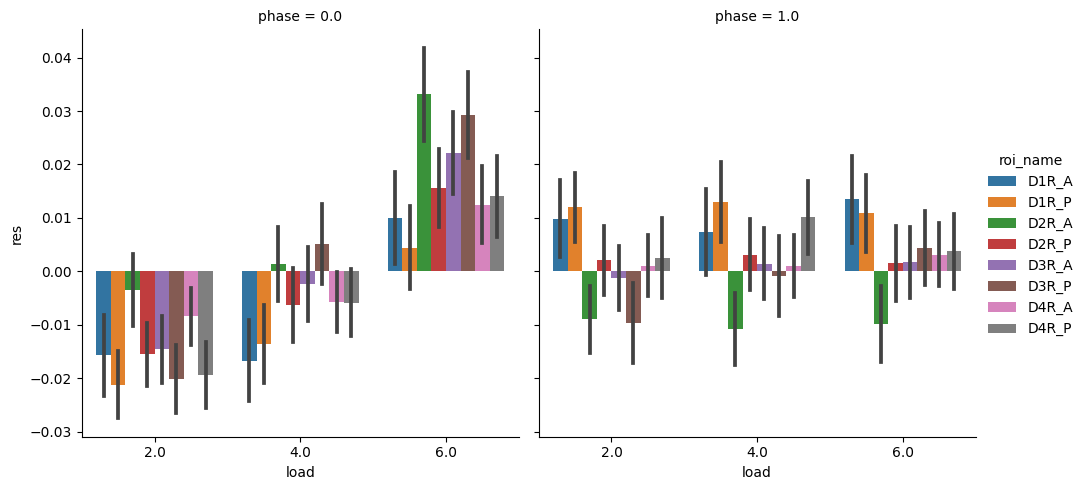

In [16]:
df44["roi_super"] = df44["roi_name"].str[0]
df44["roi_hemi"] = df44["roi_name"].str[2]
df44["AP"] = df44["roi_name"].str[-1]
sns.catplot(data = df44.loc[(df44.roi_super == "D") & (df44.roi_hemi == "R")], x="load", y="res", hue="roi_name",
                col="phase", errorbar='se', kind='bar')